# Regression model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from relife import ProportionalHazard, AgeReplacementPolicy, Weibull, Gompertz
from relife.datasets import load_insulator_string

In [2]:
cp = 1
cf = 5
discount_rate = 0.05

time, event, entry, *covar = load_insulator_string()
print(time)
print(covar)
covar = np.column_stack(covar)

[70.  30.  45.  ...  8.8  7.6 53. ]
[array([0.49, 0.76, 0.43, ..., 1.12, 1.19, 0.35]), array([1.69, 1.79, 1.61, ..., 1.76, 1.74, 1.61]), array([0.24, 0.39, 0.25, ..., 0.21, 0.24, 0.28])]


In [3]:
distrib = Weibull(5, 0.03)

In [4]:
ProportionalHazard(distrib, (1, 2, 3)).hf(2, np.random.random((10, 3)))

array([[1.44069570e-05],
       [2.19169580e-04],
       [7.61038627e-05],
       [6.27913912e-06],
       [2.12305003e-05],
       [6.01121049e-05],
       [4.08336534e-06],
       [6.72226368e-06],
       [2.08046529e-04],
       [1.46493044e-04]])

In [5]:
ph = ProportionalHazard(Gompertz()).fit(time, event, entry, model_args=(covar,))

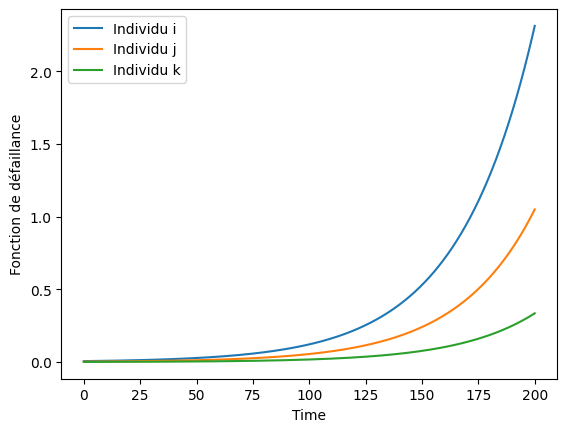

In [6]:
# plot hazard function for some individuals
i, j, k = 12, 1073, 7999
t = np.linspace(0, 200, num=1000)
plt.plot(t, ph.hf(t, covar)[i], label="Individu i")
plt.plot(t, ph.hf(t, covar)[j], label="Individu j")
plt.plot(t, ph.hf(t, covar)[k], label="Individu k")
plt.xlabel("Time")
plt.ylabel("Fonction de défaillance")
plt.legend()
plt.show()

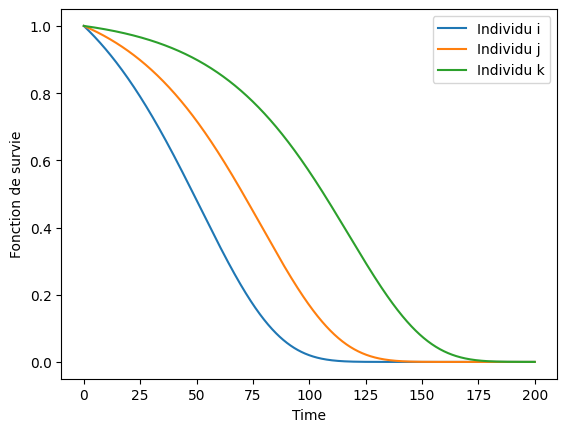

In [7]:
# plot survival functions of some individuals
plt.plot(t, ph.sf(t, covar)[i], label="Individu i")
plt.plot(t, ph.sf(t, covar)[j], label="Individu j")
plt.plot(t, ph.sf(t, covar)[k], label="Individu k")
plt.xlabel("Time")
plt.ylabel("Fonction de survie")
plt.legend()
plt.show()

## Politique de remplacement par âge dans un modèle à covariables

Il est possible de fitter une politique de remplacement par âge d'après un modèle proportionnel. Il suffit de passer les covariables dans l'argument `model_args` de la classe AgeReplacementPolicy.

In [8]:
# Calculons la politique et l'âge de remplacement pour les individus i, j, k définis ci-dessus:
policy_ph = AgeReplacementPolicy(
    ph, cf, cp, discount_rate=discount_rate, model_args=(covar[[i, j, k]],), nb_assets=3
)
policy_ph.fit(inplace=True)
print(policy_ph.ar)

[[47.46373878]
 [64.14884818]
 [94.26814652]]
